# 계층 클러스터링
* 데이터 간 계층을 기반으로 데이터 간 병합 또는 분할을 통해 해당 데이터 포인트가 속할 그룹 결정
* 병합 계층 클러스터링(agglomerative hierarchical clustering)과 분할 계층 클러스터링(divisive hierarchical clustering)로 나뉨

## 병합 계층 클러스터링
* 개별 데이터 포인트를 하나의 클러스터로 설정하고 시작하는 방법
* 그 후 두 클러스터를 비교해 유사도가 높을 경우 하나로 합침
* 다수의 클러스터로 시작하지만 결국엔 데이터 셋 전체가 하나의 클러스터로 묶이는 방법

## 분할 계층 클러스터링
* 병합과는 반대로 전체 데이터 셋을 하나의 클러스터로 놓고 시작하는 방법
* 그 후 클러스터 내부에서 가장 멀리 떨어진 데이터를 다른 클러스터로 분리하는 과정을 반복
* 덴드로그램(dendrogram)을 통해 각 레벨에서 어떻게 분리되는지 시각화 할 수 있다는 장점

### 단일 연결 (병합 계층 클러스터링)
* 가장 가까운 거리에 있는 데이터를 이용한 연결 방법
* 클러스터 쌍에서 가장 비슷한 샘플간 거리를 계산한 후 가장 작은 두 클러스터를 합침

### 완전 연결
* 가장 먼 거리에 있는 데이터를 이용한 연결 방법
* 클러스터 간 가장 비슷하지 않은 샘플을 비교하여 가장 작은 두 클러스터를 합침

### 평균 연결
* 거리의 평균 값을 이용하여 합침

## Ward's 계층 클러스터링
- 클러스터 k 집단 내에서의 오차 제곱합을 최소화

# 계층 클러스터링 실습

### 데이터 생성

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=10,
                 n_features=2,
                 random_state=0)

### 생성된 데이터 차원 확인

In [8]:
print(X.shape)
print(y.shape)

(10, 2)
(10,)


### 병합 계층 클러스터링

In [10]:
from sklearn.cluster import AgglomerativeClustering
aggc = AgglomerativeClustering(n_clusters=None,               # 일단 각 데이터 포인트가 하나의 클러스터를 구성하는 단계를 보기 위해
                              distance_threshold=0,            # 위 설정을 위해 필요한 설정
                              linkage='complete')              # 연결 방법: 완전 연결
label_aggc = aggc.fit_predict(X)
print(label_aggc)

[8 9 6 4 5 2 7 3 1 0]


### 클러스터 2개로 병합

In [12]:
aggc2 = AgglomerativeClustering(n_clusters=2,
                               linkage='complete')
label_aggc2 = aggc2.fit_predict(X)
print(label_aggc2)                                       # 7번째 데이터 포인트는 클러스터 1, 나머지는 0

[0 0 0 0 0 0 1 0 0 0]


### 클러스터 3개로 병합

In [14]:
aggc3 = AgglomerativeClustering(n_clusters=3,
                               linkage='complete')
label_aggc3 = aggc3.fit_predict(X)
print(label_aggc3)

[0 0 2 0 0 0 1 2 2 0]


### 덴드로그램 시각화

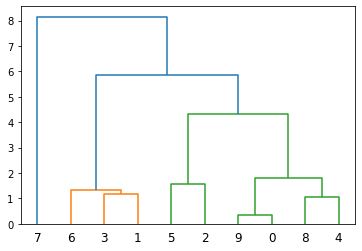

In [16]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt

linked = linkage(X, 'complete')
labels = label_aggc
dendrogram(linked,
          orientation='top',
          labels=labels,
          show_leaf_counts=True)
plt.show()